#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**CH03B Comparing hotel prices in Europe: Vienna vs. London**
eight-income-distributions  dataset

version 1.0 2021-05-05

### Import libraries and set folders

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *

warnings.filterwarnings("ignore")

# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/hotels-vienna/clean/"
data_out = dirname + "da_case_studies/ch03-hotels-vienna-explore/"
output = dirname + "da_case_studies/ch03-hotels-vienna-explore/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

# Import the prewritten helper functions
from py_helper_functions import *

In [2]:
# load vienna
vienna = pd.read_csv(data_in + "hotels-vienna.csv")

In [3]:
####################################################################################
# Figures 1a and 1b
####################################################################################
# apply filters: Hotels

In [4]:
vienna["accommodation_type"].value_counts()

Hotel                  264
Apartment              124
Pension                 16
Guest House              8
Hostel                   6
Bed and breakfast        4
Apart-hotel              4
Vacation home Condo      2
Name: accommodation_type, dtype: int64

In [5]:
vienna_cut=vienna.loc[lambda x: x['accommodation_type']=="Hotel"]

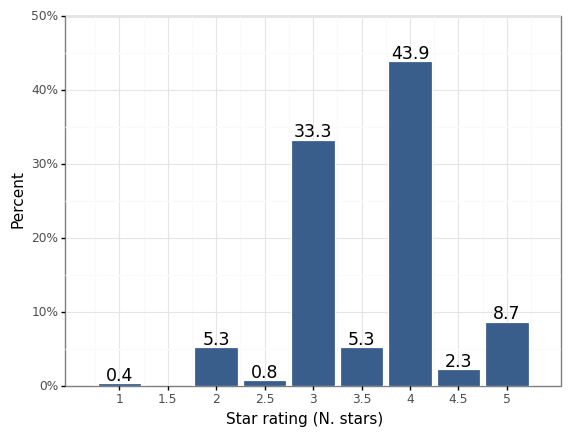

<ggplot: (310656741)>

In [6]:
ggplot(vienna_cut, aes(x="stars", y="stat(count)/sum(stat(count))")) + geom_bar(
    color="white", fill=color[0], alpha=0.8
) + labs(x="Star rating (N. stars)", y="Percent") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0.5, 5.5], breaks=seq(1, 5.1, 0.5)
) + scale_y_continuous(
    expand=[0.00, 0.00],
    limits=[0, 0.5],
    breaks=seq(0, 0.51, 0.1),
    labels=percent_format(),
) + geom_text(
    aes(
        x="stars",
        y="[x+0.01 for x in stat(count)/sum(stat(count))]",
        label="[round(num,1) for num in stat(count)/sum(stat(count))*100)]",
    ),
    stat="count",
    size=12.5,
) + theme_bw()

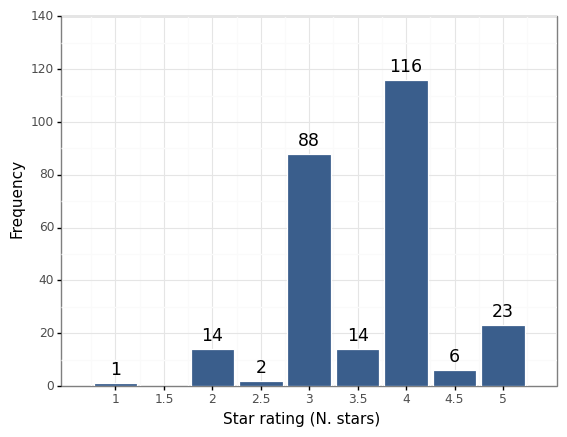

<ggplot: (310804923)>

In [7]:
ggplot(vienna_cut, aes(x="stars",y="stat(count)")) + geom_bar(
    color="white", fill=color[0], alpha=0.8
) + labs(x="Star rating (N. stars)", y="Frequency") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0.5, 5.5], breaks=seq(1, 5.1, 0.5)
) + scale_y_continuous(
    expand=[0.00, 0.00],
    limits=[0, 140],
    breaks=seq(0, 141, 20)
) + geom_text(
    aes(
        x="stars",
        y="[x+5 for x in stat(count)]",
        label="stat(count)",
    ),
    stat="count",
    size=12.5,
) + theme_bw()

In [8]:
###############################################
### DISTRIBUTIONS
###############################################
# Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value

vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["city_actual"] == "Vienna")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (~vienna["stars"].isnull())
    & (vienna["price"] <= 600)
]

In [9]:
vienna_cut['city'].value_counts()

Vienna    207
Name: city, dtype: int64

In [10]:
vienna_cut['stars'].value_counts()

4.0    111
3.0     82
3.5     14
Name: stars, dtype: int64

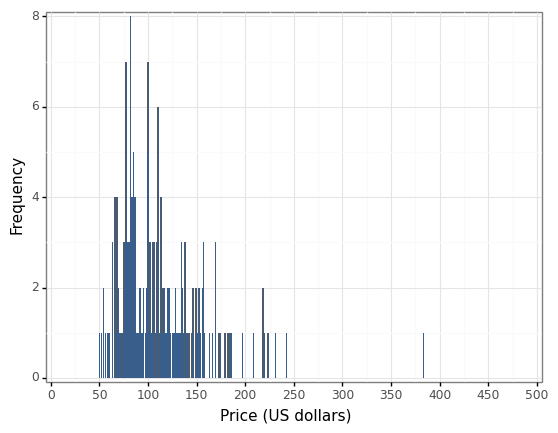

<ggplot: (310854614)>

In [11]:
####################################################################################
# Figure 3.2 a) and b)
####################################################################################

ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=1, size=0.5
) + geom_histogram(
    binwidth=1, fill=color[0], size=0.5, alpha=0.8, boundary=0,closed="left"
) + labs(
    x="Price (US dollars)", y="Frequency"
) + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=seq(0, 501, 50)
) + scale_y_continuous(
    expand=[0.01, 0.01]
) + theme_bw()

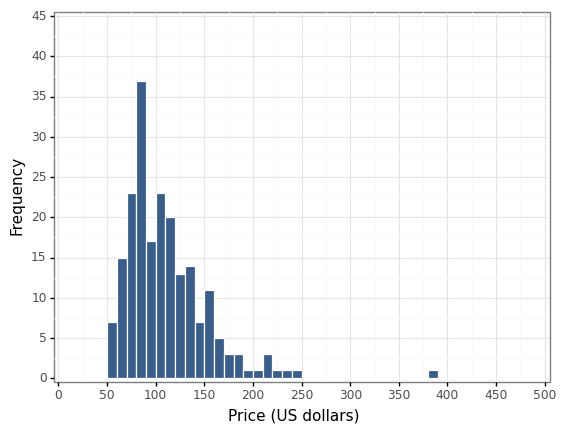

<ggplot: (310940362)>

In [12]:
ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=10, fill=color[0],color="white",boundary=0,closed="left"
) + labs(x="Price (US dollars)", y="Frequency") + expand_limits(
    x=0.01, y=0.01
) + scale_x_continuous(
    expand=[0.01, 0.01], limits=[0, 500], breaks=seq(0, 501, 50)
) + scale_y_continuous(
    expand=[0.01, 0.01], limits=[0, 45], breaks=seq(0, 46, 5)
) + theme_bw()

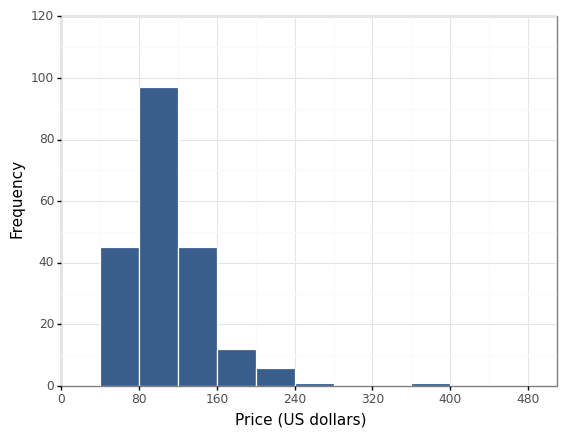

<ggplot: (310816528)>

In [13]:
####################################################################################
# Figure 3 a,b
####################################################################################
ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=40, fill=color[0], color="white", boundary=0,closed="left"
) + labs(x="Price (US dollars)", y="Frequency") + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 510], breaks=seq(0, 501, 80)
) + scale_y_continuous(
    expand=[0.0, 0.0], limits=[0, 120], breaks=seq(0, 121, 20)
) + theme_bw()

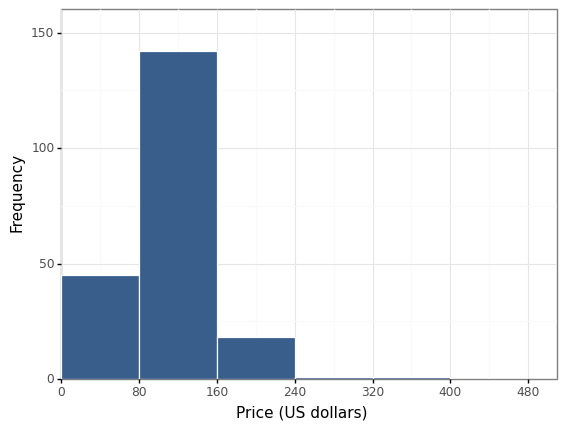

<ggplot: (310813465)>

In [14]:
ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=80, fill=color[0],color="white",boundary=0,closed="left"
) + labs(x="Price (US dollars)", y="Frequency") + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 510], breaks=seq(0, 501, 80)
) + scale_y_continuous(
    expand=[0.0, 0.0], limits=[0, 160], breaks=seq(0, 151, 50)
) + theme_bw()

In [15]:
###############################################
  ### EXTREME VALUES
###############################################
# Apply filters: 3-4 stars, less than 8miles from center, without 1000 euro extreme value

vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (~vienna["stars"].isnull())
    & (vienna["price"] <= 1000)
]

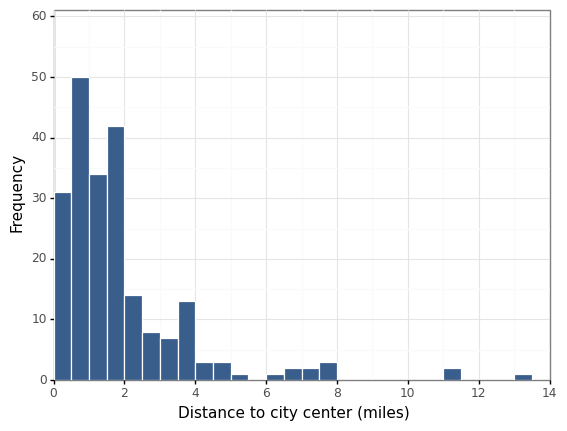

<ggplot: (311005094)>

In [16]:
########################x
# Figure 3.4
ggplot(vienna_cut, aes(x="distance")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=0.5, fill=color[0],color="white",boundary=0,closed="left"
) + labs(x="Distance to city center (miles)", y="Frequency") + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 14], breaks=seq(0, 15, 2)
) + scale_y_continuous(
    expand=[0.0, 0.0], limits=[0, 61], breaks=seq(0, 61, 10)
) + theme_bw()

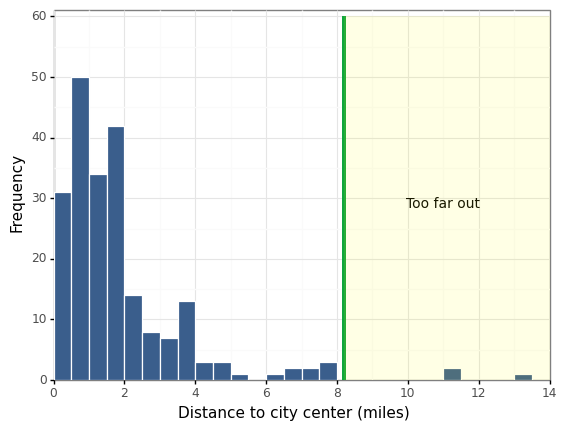

<ggplot: (310929677)>

In [17]:
# with annotation
ggplot(vienna_cut, aes(x="distance")) + geom_histogram(
    y="stat(count)/sum(stat(count))",
    binwidth=0.5,
    fill=color[0],
    color="white",
    boundary=0,
    closed="left",
) + labs(x="Distance to city center (miles)", y="Frequency") + scale_x_continuous(
    expand=[0.0, 0.0], limits=[0, 14], breaks=seq(0, 15, 2)
) + scale_y_continuous(
    expand=[0.0, 0.0], limits=[0, 61], breaks=seq(0, 61, 10)
) + geom_segment(
    aes(x=8.2, y=0, xend=8.2, yend=60), color=color[1], size=1
) + annotate(
    "text", x=11, y=29, label="Too far out", size=10
) + annotate(
    geom="rect", xmin=8.2, xmax=14, ymin=0, ymax=60, alpha=0.1, fill = "yellow"
) + theme_bw()

In [18]:
# look at actual city
vienna_cut['city_actual'].value_counts()

Vienna        207
Schwechat       7
Voesendorf      2
Fischamend      1
Name: city_actual, dtype: int64

In [19]:
####################################################################################
# Figure price with extreme
# Apply filters:  3-4 stars, less than 8miles from center, without 1000 euro extreme value
vienna_cut = vienna.loc[
    (vienna["accommodation_type"] == "Hotel")
    & (vienna["stars"] >= 3)
    & (vienna["stars"] <= 4)
    & (~vienna["stars"].isnull())
]

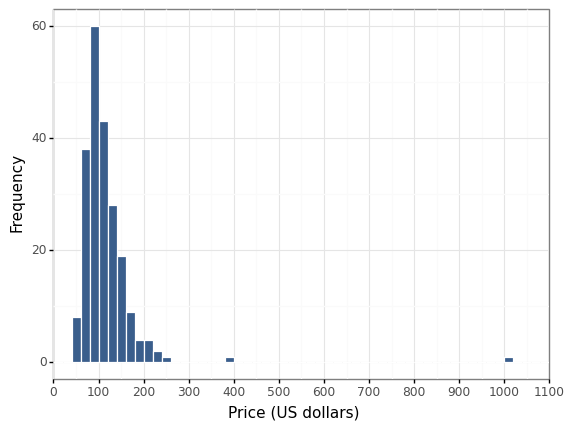

<ggplot: (310951328)>

In [20]:
ggplot(vienna_cut, aes(x="price")) + geom_histogram(
    y="stat(count)/sum(stat(count))", binwidth=20, fill=color[0], color="white",boundary=0,closed="left"
) + labs(x="Price (US dollars)", y="Frequency") + scale_x_continuous(
    expand=[0.00, 0.00], limits=[0, 1100], breaks=seq(0, 1101, 100)
) + expand_limits(
    x=0.00, y=0.00
) + theme_bw()